# Naive Bayes

IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import math
import random
from math import *

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

### DECLARAMOS LAS FUNCIONES PARA EL PROCEDIMIENTO MANUAL

### SE DIVIDEN LOS DATOS PARA UN MEJOR PROCESAMIENTO DE LA INFORMACION

In [280]:
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # inicialmente el conjunto de prueba tendrá todo el conjunto de datos
    test = list(mydata)
    while len(train) < train_num:
        # índice generado aleatoriamente desde el rango 0
        # a la longitud del conjunto de prueba
        index = random.randrange(len(test))
        # del conjunto de prueba, extraiga filas de datos y póngalo en marcha
        train.append(test.pop(index))
    return train, test #Dividiendo los datos

### SE AGRUPAN LOS DATOS DE CADA CLASE Y SE ALMACENAN EN UN DICCIONARIO

In [281]:
# Ejemplo: dict[1] y dict[0]
def groupUnderClass(mydata):
    dict = {}
    for i in range(len(mydata)):
        if (mydata[i][-1] not in dict):
            dict[mydata[i][-1]] = []
        dict[mydata[i][-1]].append(mydata[i])
    return dict

SE CALCULA LA MEDIA

In [282]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

SE CALCULA LA DESVIACION ESTANDAR

In [283]:
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

MEDIA Y DESVIACION ESTANDAR

In [284]:
def meanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    del info[-1]
    return info

HALLAMOS LA MEDIA Y LA DESVIACION ESTANDAR PARA CADA CLASE

In [285]:
def meanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = meanAndStdDev(instances)
    return info

SE CALCULA LA FUNCION DE DENSIDAD MEDIANTE LA PROBABILIDAD GAUSSIANA

In [286]:
def calculateGaussianProbability(x, mean, stdev):
    expo = exp(-((x - mean) ** 2) / (2 * stdev ** 2))
    return (1 / (sqrt(2 * pi) * stdev)) * expo

SE CALCULA LA PROBABILIDAD DE CADA CLASE

In [287]:
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

SE HALLA LA PREDICCION: La probabilidad más alta sería la predicción

In [288]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

RETORNAMOS LAS PREDICCIONES PARA UN CONJUNTO DE EJEMPLOS

In [289]:
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

SE CALCULA LA PUNTUACIÓN DE PRECISIÓN

In [290]:
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0

### TRATAMIENTO DE LOS DATOS
Se especifica la ruta de los datos en el sistema

In [291]:
# Ruta de datos en su sistema
filename = r'Heart_Disease_Data.csv'
dataset = pd.read_csv(filename,  delimiter=',')
dataset.head(-11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,58,1,2,125,220,0,0,144,0,0.4,2,0,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1


### Función para reemplazar datos

In [292]:
# Funcion para reeemplazar datos
def replace_values_in_database(database):
    database["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])
    data_replace = database["pred_attribute"]
    return data_replace

### Reemplazamos los datos en el atributo "pred_attribute" por 1 donde este el dato [1,2,3,4]

In [293]:
database = dataset
data_replace = replace_values_in_database(database)

### Visualizar que los datos se hayan reemplazado correctamente

In [294]:
database.head(-11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,58,1,2,125,220,0,0,144,0,0.4,2,0,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1


MOSTRAR CADA CARACTERISTICA DE LOS DATOS MEDIANTE UN HISTOGRAMA

Text(0.5, 1.0, 'pred_attribute')

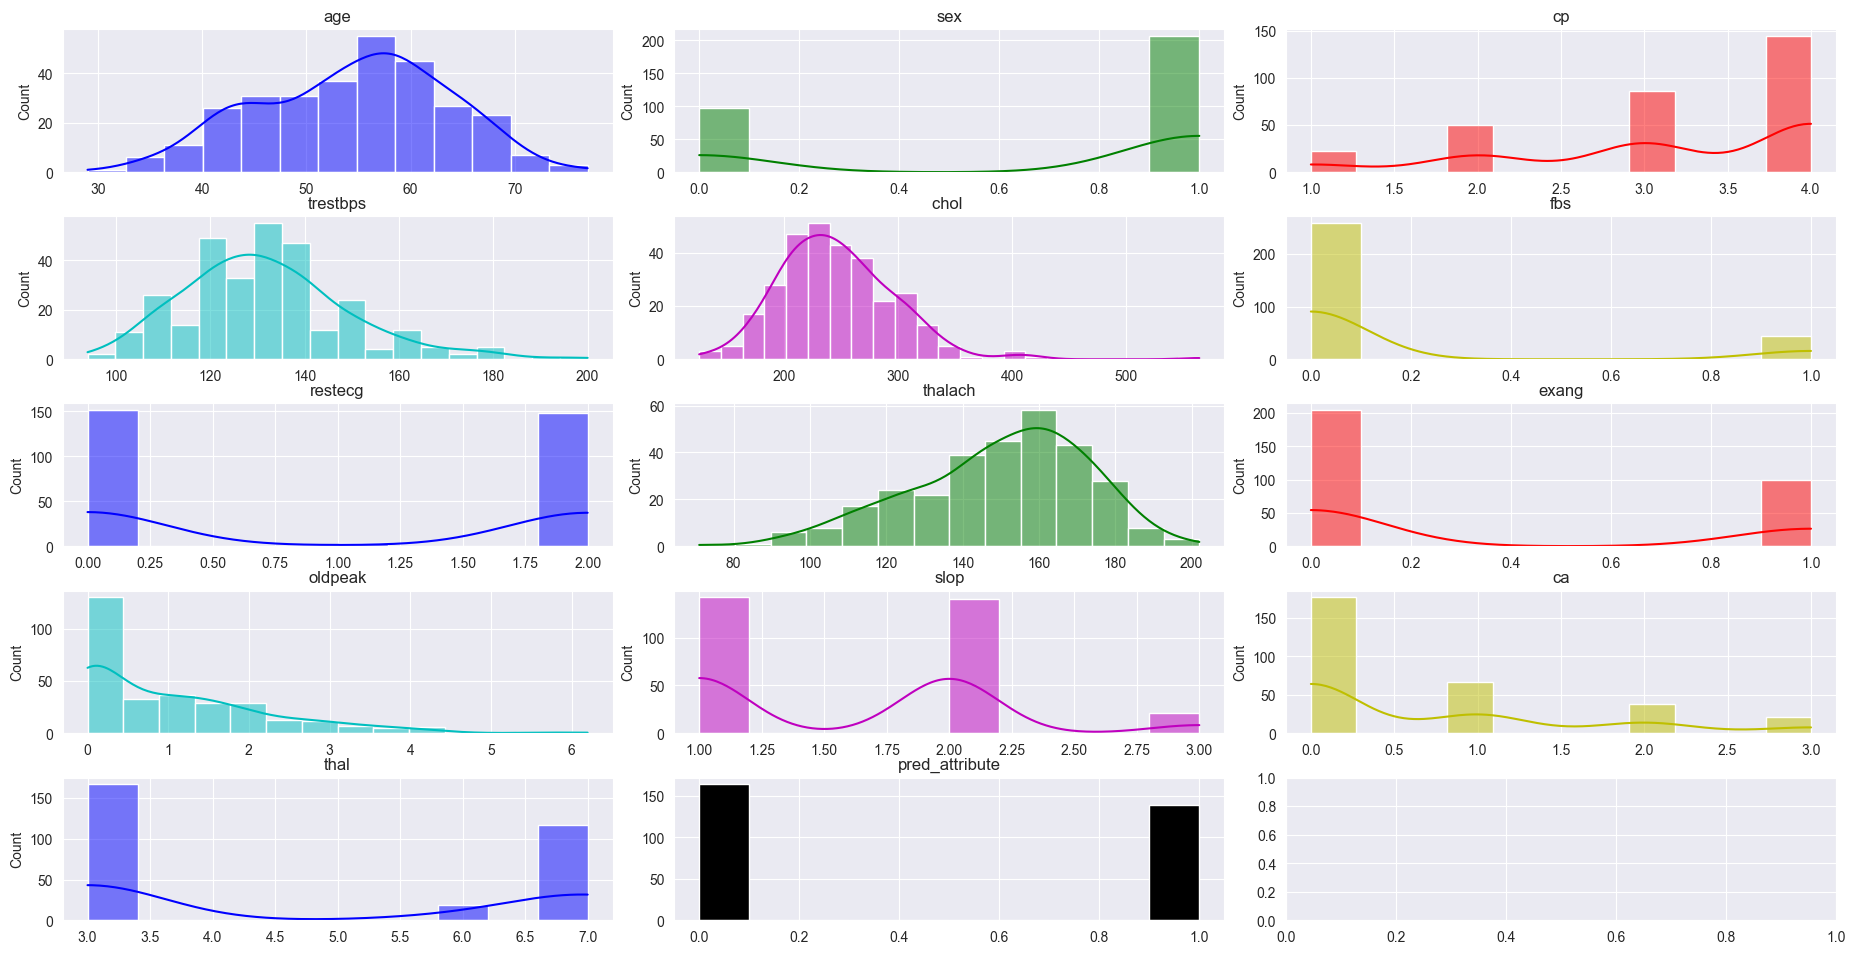

In [295]:
fig, axes = plt.subplots(5,3)
fig.set_size_inches(18.5, 9.5)
fig.tight_layout()
sns.histplot(database.values[:,0],ax=axes[0][0], kde=True, color='b').set_title("age")
sns.histplot(database.values[:,1],ax=axes[0][1], kde=True, color='g').set_title("sex")
sns.histplot(database.values[:,2],ax=axes[0][2], kde=True, color='r').set_title("cp")
sns.histplot(database.values[:,3],ax=axes[1][0], kde=True, color='c').set_title("trestbps")
sns.histplot(database.values[:,4],ax=axes[1][1], kde=True, color='m').set_title("chol ")
sns.histplot(database.values[:,5],ax=axes[1][2], kde=True, color='y').set_title("fbs")
sns.histplot(database.values[:,6],ax=axes[2][0], kde=True, color='b').set_title("restecg")
sns.histplot(database.values[:,7],ax=axes[2][1], kde=True, color='g').set_title("thalach")
sns.histplot(database.values[:,8],ax=axes[2][2], kde=True, color='r').set_title("exang")
sns.histplot(database.values[:,9],ax=axes[3][0], kde=True, color='c').set_title("oldpeak") 
sns.histplot(database.values[:,10],ax=axes[3][1], kde=True, color='m').set_title("slop") 
sns.histplot(database.values[:,11],ax=axes[3][2], kde=True, color='y').set_title("ca")
sns.histplot(database.values[:,12],ax=axes[4][0], kde=True, color='b').set_title("thal") 
axes[4][1].hist(database.values[:,13], color='k')
axes[4][1].set_title("pred_attribute")

### SE OBTIENE UN RECUENTO DEL NÚMERO DE PADECE (1) O NO_PADECEN (0) ENFERMEDADES DEL CORAZÓN

pred_attribute
0    164
1    139
Name: count, dtype: int64


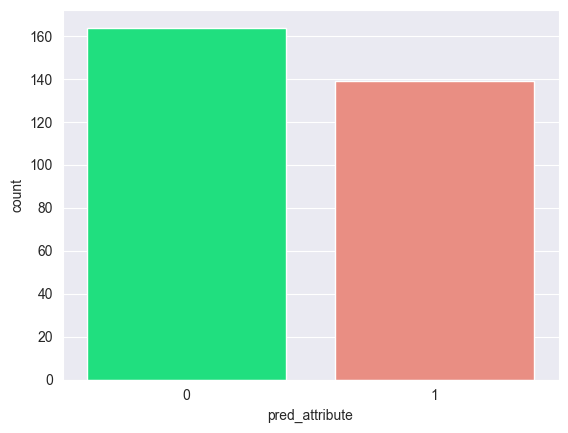

In [296]:
# Creo una paletade colores para la grafica
custom_palette = ["springgreen", "salmon"]
# Grafica de barras para la variable pred_attribute
sns.countplot(x = database['pred_attribute'], palette = custom_palette)
print(database['pred_attribute'].value_counts())

## PROCEDIMIENTO MANUAL
PREPARAMOS LOS DATOS

In [297]:
# Cargar el archivo y guardarlo en la lista mydata
mydata = database.values.tolist()
mydata = list(mydata)
del mydata[0]

# Normalizar los datos
for i in range(len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]

# Relación de la división = 0.7
# El 70 % de entrenamiento y el 30 % de prueba 
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

#para el uso de la libreria
X_train = [x[:-1] for x in train_data]
X_test = [x[:-1] for x in test_data]
y_train = [y[-1] for y in train_data]
y_test = [y[-1] for y in test_data]

# Total de ejemplos:
print('INFO: Total number of examples are: ', len(mydata))
# Total de datos para entrenamiento:
print('INFO: Out of these, training examples are: ', len(train_data))
# Total de ejemplos de prueba:
print("INFO: Test examples are: ", len(test_data))

INFO: Total number of examples are:  302
INFO: Out of these, training examples are:  211
INFO: Test examples are:  91


### APLICACION DE MODELO MANUAL

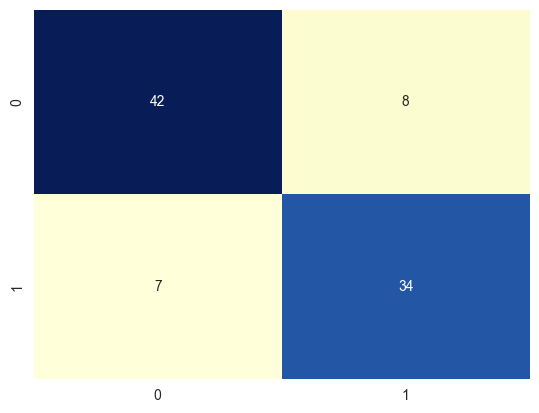

INFO MANUAL: Accuracy of the model is: 83.52% 



In [298]:
# Se calcula la media y la desviacion estandar de los atributos para cada clase
result = meanAndStdDevForClass(train_data)

# Se obtiene las predicciones de cada uno de las filas del conjunto de pruebas
y_predictions = getPredictions(result, test_data)

#Se genera la matriz de confusion entre los datos reales y la prediccion
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

# Mostramos la presicion del modelo
accuracy = accuracy_rate(test_data, y_predictions)
# Porcentaje de prediccion del modelo:
print("INFO MANUAL: Accuracy of the model is: {:.2f}% \n".format(accuracy))

### APLICACION DE LA LIBRERIA SKLEARN

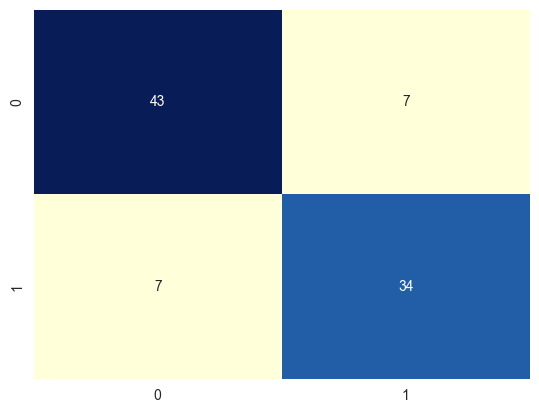

INFO LIBRERIA: Accuracy of your model is : 84.62% 

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        50
         1.0       0.83      0.83      0.83        41

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [299]:
# Se carga el modelo
classifier = GaussianNB()

# Se entrena
classifier.fit(X_train, y_train)
# Se clasifica los datos de prueba
y_predictions = classifier.predict(X_test)

# Se compara los resultados
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

# Precision del modelo:
print("INFO LIBRERIA: Accuracy of your model is : {:.2f}% \n".format(accuracy_score(y_test, y_predictions)*100))
print(classification_report(y_test, y_predictions))

## RED BAYESIANA

Librerias

In [300]:
from pgmpy.models import BayesianNetwork
from pgmpy.sampling import BayesianModelSampling
import networkx as nx

Creacion de objetos vacios

In [301]:
# Crear un objeto de red bayesiana vacío
model = BayesianNetwork()

Relaciones entre variables

In [302]:
# Agregar las relaciones entre las variables
model.add_edges_from([
    ('age', 'sex'), ('age', 'cp'), ('age', 'trestbps'), ('age', 'chol'), 
    ('age', 'fbs'), ('age','restecg'), ('age', 'thalach'), ('age', 'exang'), 
    ('age', 'oldpeak'), ('age', 'slop'), ('age', 'ca'), ('age', 'thal'), 
    ('age', 'pred_attribute'), ('sex', 'cp'), ('sex', 'trestbps'), ('sex', 'chol'), 
    ('sex', 'fbs'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'exang'), 
    ('sex', 'oldpeak'), ('sex', 'slop'), ('sex', 'ca'), ('sex', 'thal'), 
    ('sex', 'pred_attribute'), ('cp', 'trestbps'), ('cp', 'chol'), ('cp', 'fbs'), 
    ('cp', 'restecg'), ('cp', 'thalach'), ('cp', 'exang'), ('cp', 'oldpeak'), 
    ('cp', 'slop'), ('cp', 'ca'), ('cp', 'thal'), ('cp', 'pred_attribute'), 
    ('trestbps', 'chol'), ('trestbps', 'fbs'), ('trestbps', 'restecg'), 
    ('trestbps', 'thalach'), ('trestbps', 'exang'), ('trestbps', 'oldpeak'), 
    ('trestbps', 'slop'), ('trestbps', 'ca'), ('trestbps', 'thal'), 
    ('trestbps', 'pred_attribute'), ('chol', 'fbs'), ('chol', 'restecg'), 
    ('chol', 'thalach'), ('chol', 'exang'), ('chol', 'oldpeak'), ('chol', 'slop'), 
    ('chol', 'ca'), ('chol', 'thal'), ('chol', 'pred_attribute'), ('fbs', 'restecg'), 
    ('fbs', 'thalach'), ('fbs', 'exang'), ('fbs', 'oldpeak'), ('fbs', 'slop'), 
    ('fbs', 'ca'), ('fbs', 'thal'), ('fbs', 'pred_attribute'), ('restecg', 'thalach'), 
    ('restecg', 'exang'), ('restecg', 'oldpeak'), ('restecg', 'slop'), ('restecg', 'ca'), 
    ('restecg', 'thal'), ('restecg', 'pred_attribute'), ('thalach', 'exang'), 
    ('thalach', 'oldpeak'), ('thalach', 'slop'), ('thalach', 'ca'), ('thalach', 'thal'), 
    ('thalach', 'pred_attribute'), ('exang', 'oldpeak'), ('exang', 'slop'), ('exang', 'ca'), 
    ('exang', 'thal'), ('exang', 'pred_attribute'), ('oldpeak', 'slop'), ('oldpeak', 'ca'), 
    ('oldpeak', 'thal'), ('oldpeak', 'pred_attribute'), ('slop', 'ca'), ('slop', 'thal'), 
    ('slop', 'pred_attribute'), ('ca', 'thal'), ('ca', 'pred_attribute'), 
    ('thal', 'pred_attribute')
])

Parametros para graficar la red bayesiana

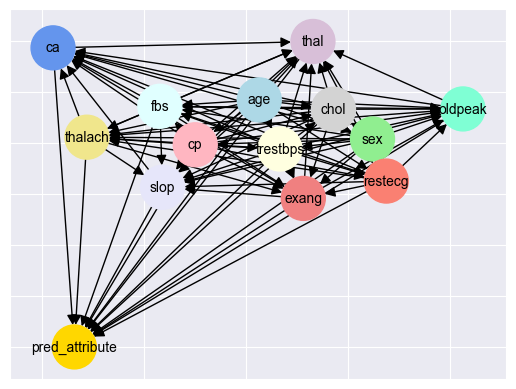

In [303]:
# Crear un objeto de grafo dirigido desde el modelo
graph = nx.DiGraph(model.edges()) 

# Definir colores para cada nodo
colors = colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 
'lightgray', 'lightcyan', 'salmon', 'khaki', 'lightcoral', 'aquamarine', 
'lavender', 'cornflowerblue', 'thistle', 'gold']

# Dibujar el grafo con colores personalizados
pos = nx.spring_layout(graph, seed=42)  # Posiciones de los nodos
nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=colors, node_size=1000, font_size=10, arrowsize=15)

# Guardar el gráfico en un archivo
plt.savefig('bayesian_model.png', dpi=300)

# Mostrar el gráfico en pantalla
plt.show()